# Home Work 2 
## Alejandro Moscoso 332336908
## 

Generate 100 samples from a N(0, 1) distribution. Compute a 95% CI for the CDF. Repeat this 1000 
times and compute the percentage of time
that the interval contained the CDF. In addition plot in a single figure the
true CDF the best and the worst experiment (use maxx|F(x) − Fˆ
n(x)| as
quality measure).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import seaborn as sb
from pprint import pprint
sb.set_style('whitegrid')
matplotlib.rcParams.update({'font.size': 22,'figure.figsize':[12, 12.0]})
import os
os.getcwd()
hw2_path= r'\Homework\DataAnalisis\Hw2'
samsumn= os.getcwd()+hw2_path+r'\samsungData.csv'
print (samsumn)

C:\Users\salemos\Documents\DataAnalisis\Hw2\Homework\DataAnalisis\Hw2\samsungData.csv


0.968


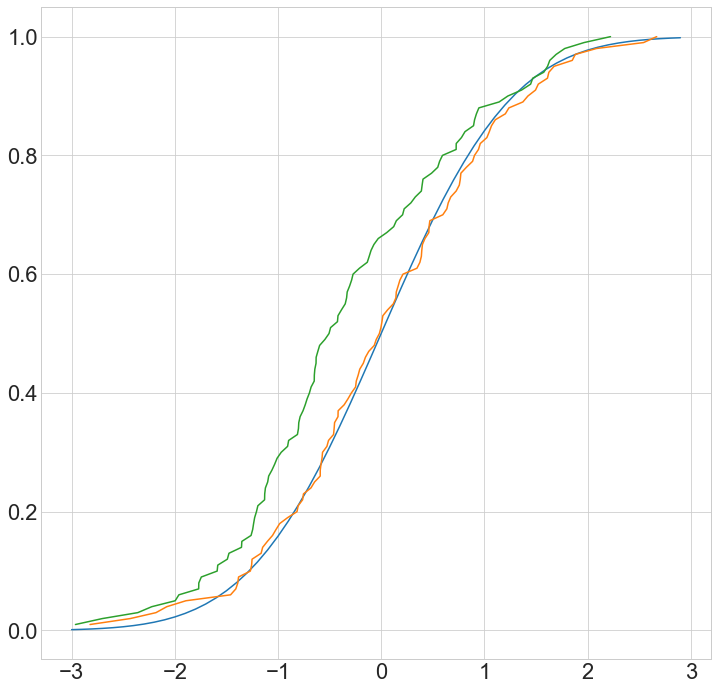

In [2]:

N=100
data = np.random.randn(N)
miu= 0
var = 1/N

def ecdf(data):
    xs= np.sort(data)
    ys=np.arange(1,len(xs)+1)/float(len(xs))
    return xs , ys

def DKW_95(data):
    sample_size = len(data)
    error = np.sqrt((-1)*np.log(0.025)/(2*sample_size))
    return error

def max_cdfdi_diference(data):
    real_cdf=stats.norm.cdf(np.sort(data))
    empiri_cdf = ecdf(data)[1]
    return np.max(np.absolute(real_cdf - empiri_cdf))

def critical_95(data,standar_dev):
    sample_size= len(data)
    z_critical = stats.norm.ppf(q = 0.975)
    margin_of_error = z_critical * (standar_dev/np.sqrt(sample_size))
    sample_mean = np.mean(data)
    return (sample_mean - margin_of_error, sample_mean + margin_of_error)

def question_1(sample_sise, repetitions):
    miu= 0
    var = 1/N
    hit_times =0
    max_error_bigger=0
    best_match=8
    
    data_plot={'real':pd.Series(stats.norm.cdf(np.arange(-3,3,0.1)),np.arange(-3,3,0.1))}
    
    
    for _ in range(repetitions):
        data = np.random.randn(N)
        max_error = DKW_95(data)
        
        real_error = max_cdfdi_diference(data)
        if (max_error>= real_error):
            hit_times += 1
            
        if (max_error_bigger<real_error):
            max_error_bigger=real_error
            data_plot['worst']= pd.Series(ecdf(data))
            
        if (real_error<best_match):
            best_match=real_error
            data_plot['best']=pd.Series( ecdf(data))
    data_plot['hit_rate'] = hit_times/float(repetitions)
    return data_plot
data_plot = question_1(100,1000)
plt.figure()
plt.plot(data_plot['real'])
plt.plot(data_plot['best'][0],data_plot['best'][1])
plt.plot(data_plot['worst'][0],data_plot['worst'][1])
print (data_plot['hit_rate'])
plt.show()

In [99]:
samsungData=pd.read_csv('samsungData.csv').drop(['Unnamed: 0'],axis= 1)
samsungData_cut = samsungData.iloc[:,1:-2]
corr_samsungData_cut=samsungData_cut.corr()

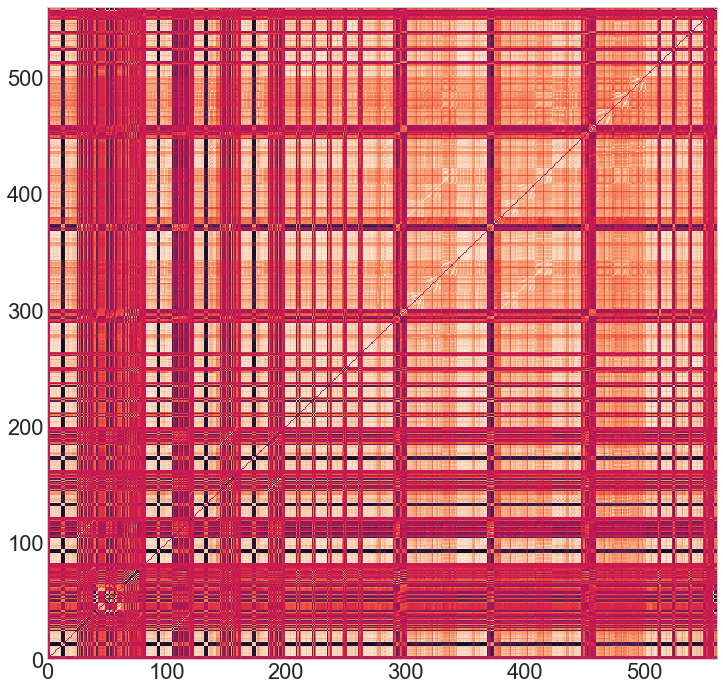

In [108]:
plt.pcolor(corr_samsungData_cut)
plt.show()

In [147]:
def find_max(data):
    data1=data.copy()
    for _ in range(len(data1.columns)):
        data1.iloc[_,_]=0
    results={'max_value':float(-1)}
   
    for col in range(len(data1.columns)):
        for ind in range(len(data1.index)):
            if results['max_value'] <= data1.iloc[ind,col]:
                results['max_value'] = data1.iloc[ind,col]
                results['index'] =data1.columns[ind]
                results['column']= data1.columns[col]
    return results

def data_by_activity(data):
    data1=data.copy()
    results={}
    for activity in data.activity.unique():
        results[activity] = data1[data1.activity==activity].drop(['activity'],axis= 1)
    return results

def find_corr(data):
    dic_df_data = data_by_activity(data)
    return {key:value.corr() for key, value in dic_df_data.items()}
    

a=data_by_activity(samsungData)
find_max(corr_samsungData_cut)

{'column': 'fBodyBodyGyroJerkMag-sma()',
 'index': 'fBodyBodyGyroJerkMag-mean()',
 'max_value': 1.0}

In [148]:
a= find_corr(samsungData)


In [161]:
b=a['standing']
samsungData[['fBodyBodyGyroJerkMag-sma()','fBodyBodyGyroJerkMag-mean()']].head()


,fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-mean()
0,-0.991990,-0.991990
1,-0.995854,-0.995854
2,-0.995031,-0.995031
3,-0.995221,-0.995221
4,-0.995093,-0.995093


In [128]:
def find_all_corr(data):
    corr_table = find_corr(data)
    results={}
    for key in corr_table.keys():
        results[key]=find_max(corr_table[key])
    return results
    

In [129]:
pprint(find_all_corr(samsungData))

{'laying': {'column': 'fBodyBodyGyroJerkMag-sma()',
            'index': 'fBodyBodyGyroJerkMag-mean()',
            'max_value': 1.0},
 'sitting': {'column': 'fBodyBodyGyroJerkMag-sma()',
             'index': 'fBodyBodyGyroJerkMag-mean()',
             'max_value': 1.0},
 'standing': {'column': 'fBodyBodyGyroJerkMag-sma()',
              'index': 'fBodyBodyGyroJerkMag-mean()',
              'max_value': 1.0},
 'walk': {'column': 'fBodyBodyGyroJerkMag-sma()',
          'index': 'fBodyBodyGyroJerkMag-mean()',
          'max_value': 1.0},
 'walkdown': {'column': 'fBodyBodyGyroJerkMag-sma()',
              'index': 'fBodyBodyGyroJerkMag-mean()',
              'max_value': 1.0},
 'walkup': {'column': 'fBodyBodyGyroJerkMag-sma()',
            'index': 'fBodyBodyGyroJerkMag-mean()',
            'max_value': 1.0}}


In [231]:
def boot_strap_std(series,times_sample, sample_size):   
    var_vector =[np.std(np.random.choice(series,size=sample_size, replace=True)) for sample_time in range(times_sample)]    
    return dict(std = np.std(var_vector), miu=np.mean(var_vector))

def boot_strap_std_cov(data_frame,times_sample, sample_size):   
    co_var_vector=[]
    for time in range(times_sample):
        vector1= []
        vector2 = []
        indexs = [np.random.randint(low=0,high=len(data_frame.index)) for _ in range(sample_size) ]
        for index in indexs:            
            vector1.append(data_frame.iloc[index,0])
            vector2.append(data_frame.iloc[index,1])
        co_var_vector.append( np.cov(vector1,vector2)[0,1])

   
    return dict( std=np.std(co_var_vector), miu=np.mean(co_var_vector))


In [232]:
boot_strap_std_cov(samsungData[['fBodyBodyGyroJerkMag-sma()','fBodyBodyGyroJerkMag-mean()']],10,3)

{'miu': 0.077465221237266652, 'std': 0.08979991118888879}

In [235]:
np.cov([-0.93715758999999998, -0.72361743999999995, -0.32781763000000003],
[-0.93715758999999998, -0.72361743999999995, -0.32781763000000003])[0,1]


0.095592012018476683

In [215]:
[np.random.randint(low=0,high=40) for _ in range(10) ]

[3, 17, 32, 17, 36, 17, 26, 36, 7, 8]

In [185]:
np.random.choice(samsungData[['fBodyBodyGyroJerkMag-sma()','fBodyBodyGyroJerkMag-mean()']].T)

ValueError: a must be 1-dimensional